In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from models import V as Vision
from models import V_inverse

In [22]:
import os
from tqdm import tqdm

In [14]:
from utils import to_latent

In [3]:
V = Vision()

In [4]:
decoder = V_inverse()

In [5]:
V.load_weights('./data/weights/2019.12.07/encoder_weights')

In [6]:
decoder.load_weights('./data/weights/2019.12.07/decoder_weights')

In [7]:
im = np.load('./sausage/states/state420_69.npy')

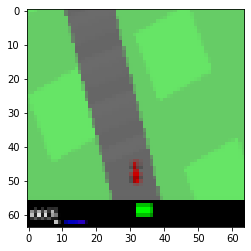

In [8]:
plt.imshow(im)

In [9]:
batch = np.zeros((128, 64, 64, 3))

In [10]:
batch[0] = im

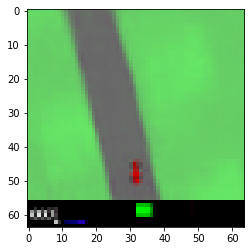

In [12]:
plt.imshow(decoder(V(batch)[2])[0])

In [15]:
state_files = os.listdir('./sausage/states')

In [16]:
state_files

['state232_246.npy',
 'state48_366.npy',
 'state46_62.npy',
 'state225_259.npy',
 'state362_289.npy',
 'state46_164.npy',
 'state95_68.npy',
 'state484_302.npy',
 'state487_162.npy',
 'state336_164.npy',
 'state205_311.npy',
 'state308_230.npy',
 'state140_65.npy',
 'state280_129.npy',
 'state264_133.npy',
 'state430_267.npy',
 'state182_30.npy',
 'state271_51.npy',
 'state2_209.npy',
 'state470_21.npy',
 'state346_320.npy',
 'state91_360.npy',
 'state290_354.npy',
 'state456_219.npy',
 'state318_349.npy',
 'state112_165.npy',
 'state364_253.npy',
 'state379_294.npy',
 'state69_230.npy',
 'state22_252.npy',
 'state28_236.npy',
 'state98_6.npy',
 'state286_359.npy',
 'state491_102.npy',
 'state438_91.npy',
 'state494_381.npy',
 'state412_68.npy',
 'state452_341.npy',
 'state267_377.npy',
 'state172_60.npy',
 'state243_108.npy',
 'state67_317.npy',
 'state121_273.npy',
 'state31_289.npy',
 'state362_194.npy',
 'state489_331.npy',
 'state208_95.npy',
 'state433_140.npy',
 'state30_104.npy

In [17]:
len(state_files)

192000

In [18]:
192000 % 128

0

In [26]:
for i in tqdm(range(500)):
    trace = np.zeros((128*3, 64, 64, 3))
    for j in range(128*3):
        trace[j] = np.load(f'./sausage/states/state{i}_{j}.npy')
    
    z_state = to_latent(V, trace)
    
    for j in range(128*3):
        np.save(f'./sausage/z_states/z_state{i}_{j}.npy', z_state[j])
    
    
    if i % 100 == 0:
        np.save(f'./sausage/demo/trace{i}.npy', trace)

100%|██████████| 500/500 [59:44<00:00,  7.17s/it]  
